# II. Grid-based Hydrodynamics

The project write-up should include the following components:
1. Introduction. Describe the aims and theory.
2. Methods. Explain the methods (incl. software/hardware).
3. Results. Present the results, including figures and tables.
4. Analysis. Analyse and discuss the results in relation to the theory.


## Aims and theory

We solve the equation,

 $du(x,t)/dt = h(u,x,t)$
 
There are different time differencing schemes that can be used to do this. We initially start with three and apply them to the simple ordinary differential equation.

$du(x,t)/dt = -u(x,t)$

With this we analyse there accuracy.

Following this we introduce a fourth scheme and look at it's stability and the stability of the other schemes.

## Methods

Using the programming language python and the plotting package pyplot from matplotlib we obtain and visualise these results.

To find the exact solution, I solved the simple ODE

$du(x,t)/dt = -u(x,t)$

With the solution $u(x,t)= e^{-t}$.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

def get_results(u_0,delta_t,method):
    data = []
    u_n = u_0
    time = 0
    for i in range(0,26):    
        data.append([time,u_n])
        u_n = method(u_n,delta_t)
        time = time + delta_t  
    return data


def forward_time(u_n,delta_t):
    return u_n - u_n * delta_t

def backward_time(u_n,delta_t):
    return u_n/(1+delta_t)

def centered_time(u_n,delta_t):
    return (2*u_n-u_n*delta_t)/(2+delta_t)

forward_data = get_results(1,0.2,forward_time)
backward_data = get_results(1,0.2,backward_time)
centered_data = get_results(1,0.2,centered_time)

# exact results
exact_x = []
exact_y = []
time = 0
for i in range(0,26):
    exact_y.append(math.exp(-time))
    exact_x.append(time)
    time = time+0.15    
# array subtraction later    
exact_y = np.array(exact_y)


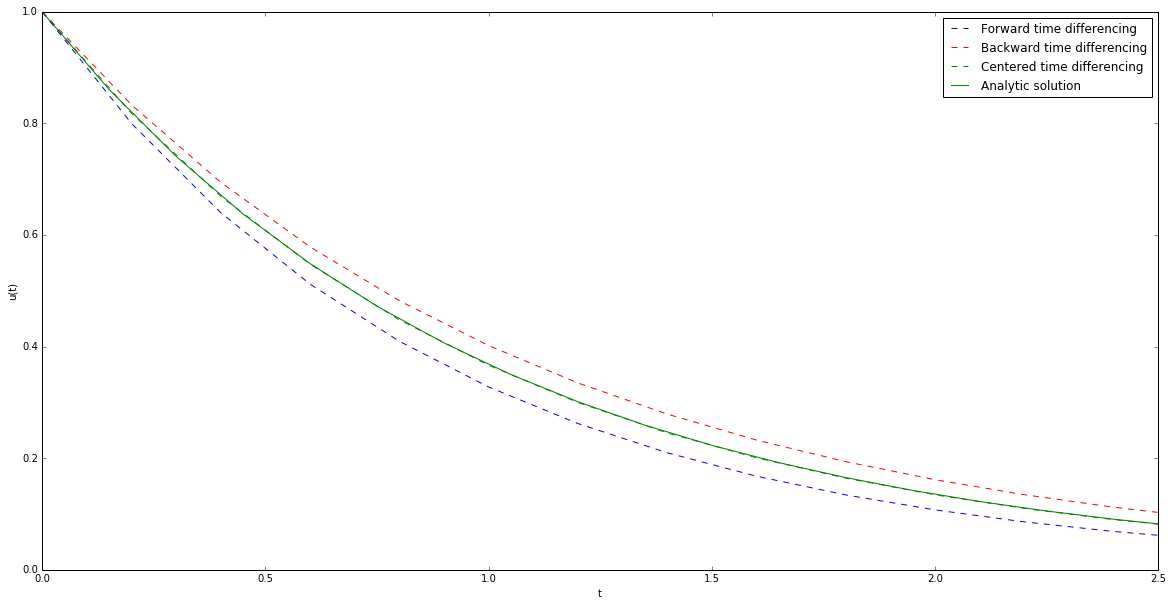

In [44]:
plt.figure(figsize=(20,10))
plt.plot( [row[0] for row in forward_data],[row[1] for row in forward_data], '--', label='Forward time differencing')
plt.plot([row[0] for row in backward_data],[row[1] for row in backward_data], 'r--',label='Backward time differencing')
plt.plot([row[0] for row in centered_data],[row[1] for row in centered_data], 'g--',label='Centered time differencing')
plt.plot(exact_x,exact_y, label='Analytic solution')
plt.ylabel('u(t)')
plt.xlabel('t')
plt.xlim(0,2.5)
plt.legend()
plt.savefig('Time differencing')

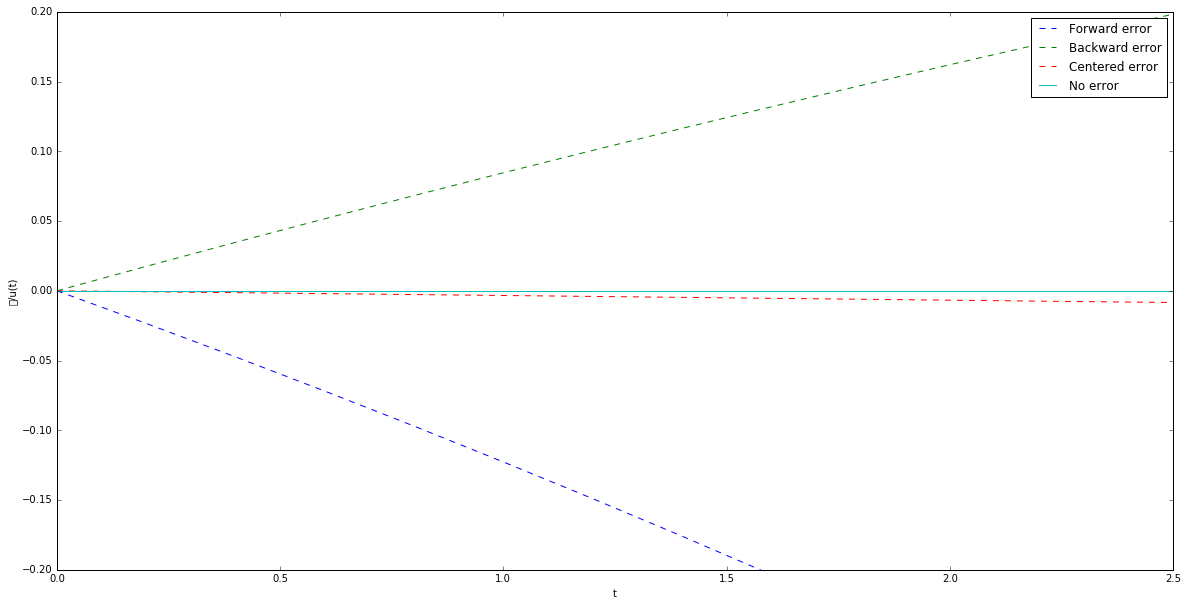

In [50]:
plt.figure(figsize=(20,10))

# exact results
exact_x = []
exact_y = []
time = 0
delta_t = 0.2
for i in range(0,260):
    exact_y.append(math.exp(-time))
    exact_x.append(time)
    time = time+delta_t   
# array subtraction later    
exact_y = np.array(exact_y)

x_forward = [row[0] for row in forward_data]
x_backward = [row[0] for row in backward_data]
x_centered = [row[0] for row in centered_data]
y_forward = [row[1] for row in forward_data]
y_backward = [row[1] for row in backward_data]
y_centered = [row[1] for row in centered_data]

plt.xlim(0,2.5)
plt.ylim(-0.2,0.2)
plt.plot( x_forward,(y_forward-exact_y)/y_forward, '--',label='Forward error')
plt.plot( x_backward,(y_backward-exact_y)/y_backward, '--',label='Backward error')
plt.plot( x_centered,(y_centered-exact_y)/y_centered, '--',label='Centered error')
plt.plot( x_centered,0/exact_y, '-',label='No error')
plt.legend()
plt.ylabel('ϵ/u(t)')
plt.xlabel('t')
plt.savefig('ODE_error.png')

Now we look at the stability of these schemes and a fourth scheme,

$\frac{(u^{n+1} - u^{n-1})}{ 2Δx = u^{n}} $

In [18]:
def fourth_scheme(u_n,u_n_minus,delta_t):
    return -2*delta_t*u_n+u_n_minus, u_n

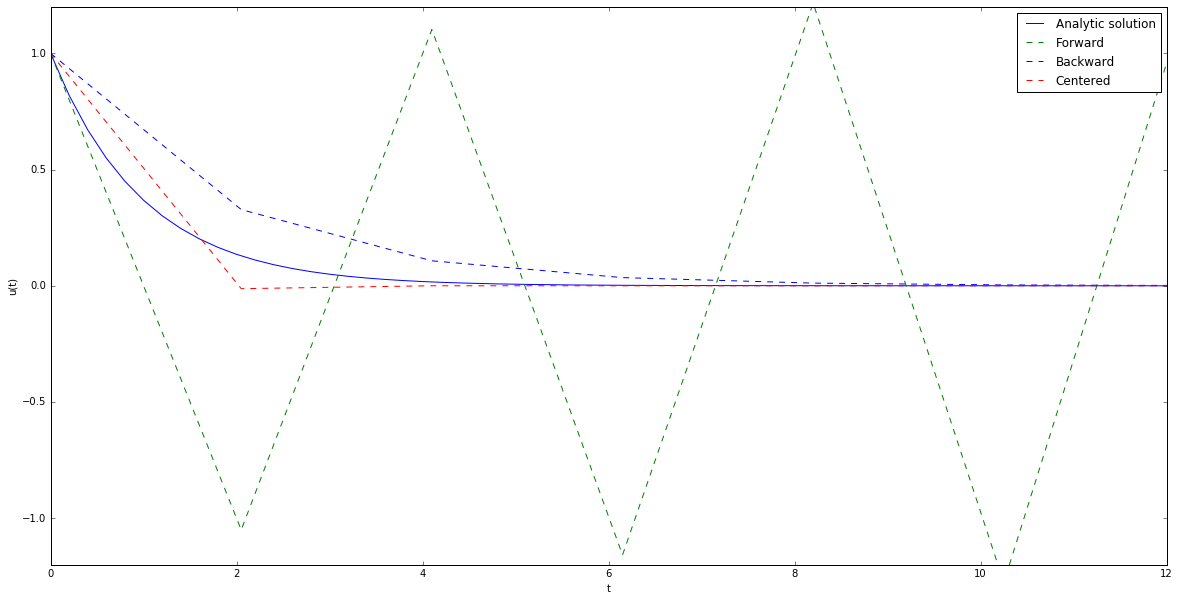

In [65]:
forward_data = get_results(1,2.05,forward_time)
backward_data = get_results(1,2.05,backward_time)
centered_data = get_results(1,2.05,centered_time)

# exact results
exact_x = []
exact_y = []
time = 0
delta_t = 0.2
for i in range(0,130):
    exact_y.append(math.exp(-time))
    exact_x.append(time)
    time = time+delta_t   
# array subtraction later    
exact_y = np.array(exact_y)


plt.figure(figsize=(20,10))
plt.xlim(0,12)
plt.plot(exact_x,exact_y,label='Analytic solution')
plt.plot([row[0] for row in forward_data],[row[1] for row in forward_data], 'g--',label='Forward')
plt.plot([row[0] for row in backward_data], [row[1] for row in backward_data], 'b--',label='Backward')
plt.plot([row[0] for row in centered_data], [row[1] for row in centered_data], 'r--',label='Centered')
plt.ylabel('u(t)')
plt.xlabel('t')
plt.legend()
plt.ylim(-1.2,1.2)
plt.savefig('Delta205.png')

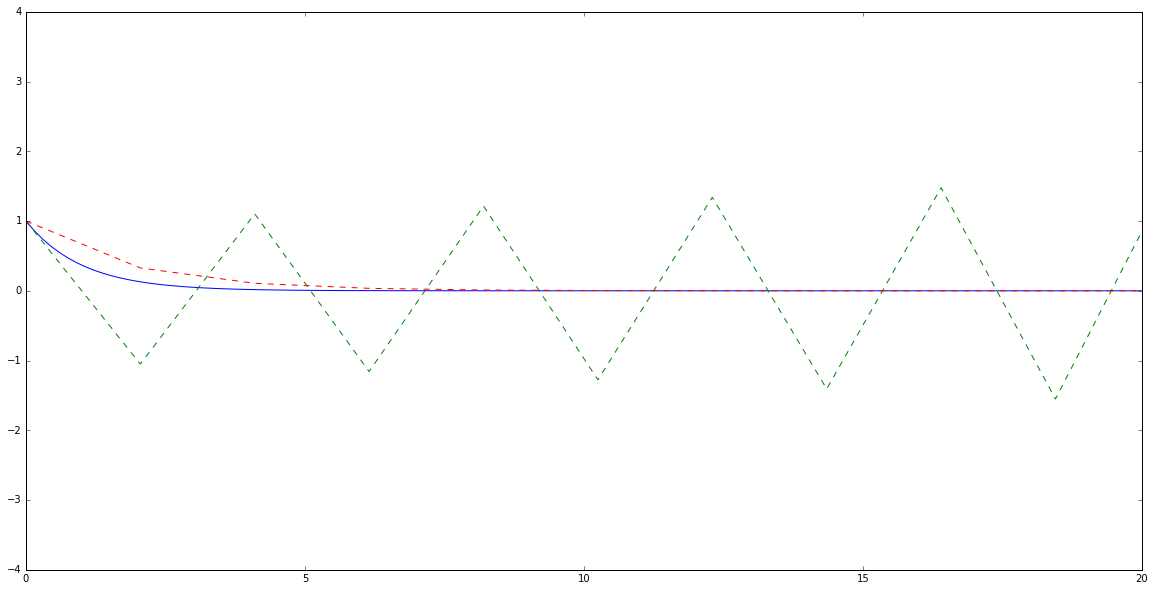

In [8]:
forward_data = get_results(1,2.05,forward_time)
backward_data = get_results(1,2.05,backward_time)

plt.figure(figsize=(20,10))
plt.xlim(0,20)
plt.plot(exact_x,exact_y, [row[0] for row in forward_data],[row[1] for row in forward_data], 'g--',
        [row[0] for row in backward_data], [row[1] for row in backward_data], 'r--')

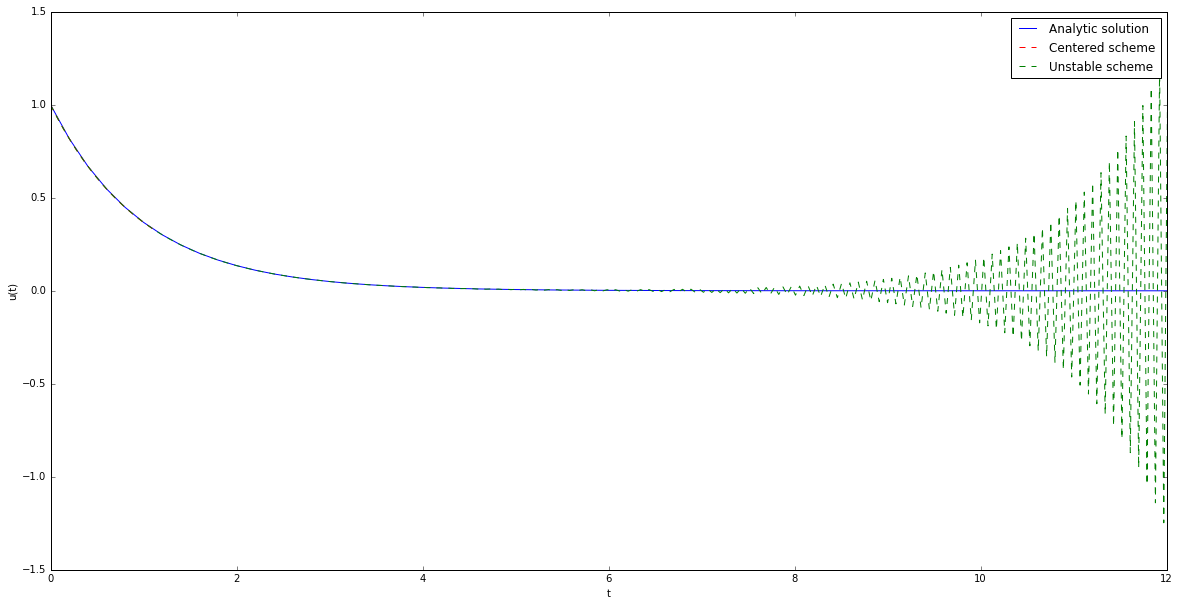

In [64]:
centered_data = get_results(1,0.045,centered_time)

fourth_data = []

def fourth_scheme(u_n,u_n_minus,delta_t):
    return -2*delta_t*u_n+u_n_minus, u_n

delta_t = 0.045
time = 0
u_n = 1
u_n_minus = math.exp(delta_t)
for i in range(0,300):
    fourth_data.append([time,u_n])
    time = time + delta_t
    u_n, u_n_minus = fourth_scheme(u_n,u_n_minus,delta_t) 
    
plt.figure(figsize=(20,10))
plt.xlim(0,12)
plt.ylim(-1.5,1.5)
plt.plot(exact_x,exact_y, label='Analytic solution')
plt.plot([row[0] for row in centered_data],[row[1] for row in centered_data], 'r--',label='Centered scheme')
plt.plot([row[0] for row in fourth_data],[row[1] for row in fourth_data], 'g--',label='Unstable scheme')
plt.ylabel('u(t)')
plt.xlabel('t')
plt.legend()
plt.savefig('Delta0045.png')

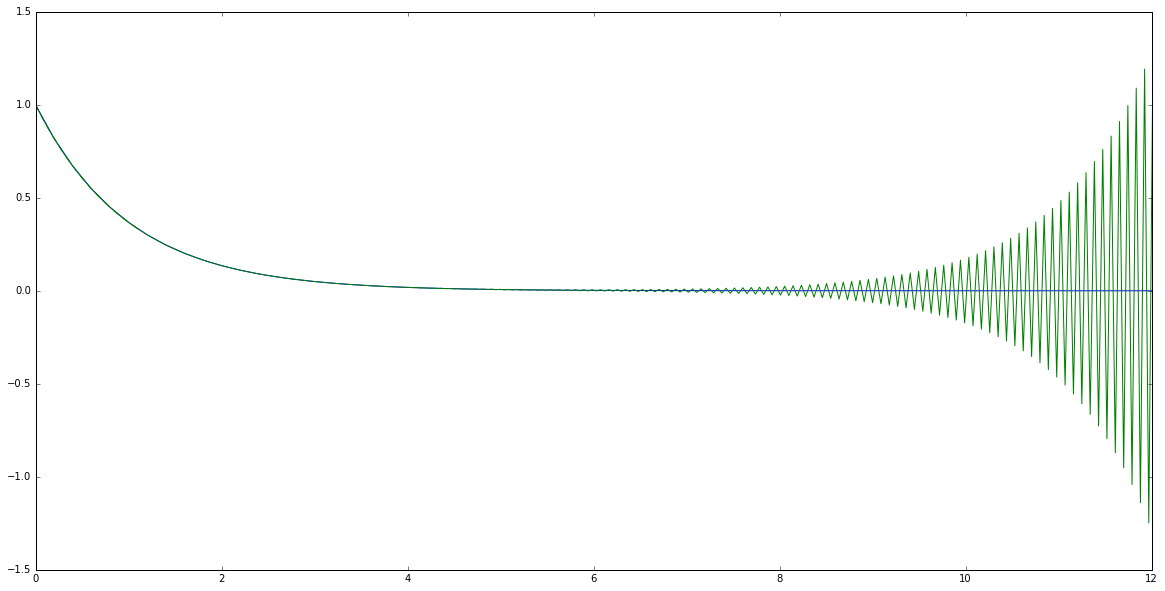

In [63]:
centered_data = get_results(1,0.045,centered_time)

fourth_data = []

def fourth_scheme(u_n,u_n_minus,delta_t):
    return -2*delta_t*u_n+u_n_minus, u_n

delta_t = 0.045
time = 0
u_n = 1
u_n_minus = math.exp(delta_t)
for i in range(0,300):
    fourth_data.append([time,u_n])
    time = time + delta_t
    u_n, u_n_minus = fourth_scheme(u_n,u_n_minus,delta_t) 
    
plt.figure(figsize=(20,10))
plt.xlim(0,12)
plt.ylim(-1.5,1.5)
plt.plot(exact_x,exact_y, [row[0] for row in centered_data],[row[1] for row in centered_data], 'g--',
        [row[0] for row in fourth_data],[row[1] for row in fourth_data], 'g-')

## Analysis

As you can see all the schemes except from the centered scheme show some instability.

The forward scheme and the backward scheme show stability for delta t equal to 1.5 and instability for 2.05. This makes the conditionally stable.

The centered scheme is stable for all t.

The fourth scheme is unconditionally unstable, for any value delta t it will not settle on the correct value.